# NINJACART-BUSINESS CASE STUDY

---

### **Problem Context**

* Build a **multiclass classifier** for **onion, potato, tomato, and Indian market (noise)** images.
* Dataset is provided (train and test folders with 4 subfolders each).

---

### **Dataset Details**

* **Train folder (3135 images):**

  * Tomato: 789
  * Potato: 898
  * Onion: 849
  * Indian market: 599

* **Test folder (351 images):**

  * Tomato: 106
  * Potato: 83
  * Onion: 81
  * Indian market: 81

---

### **Steps to Solve**

1. **Import Libraries**

   * Use libraries like: `TensorFlow`, `Keras`, `Matplotlib`, `Seaborn`, `OpenCV`, etc.

2. **Download and Prepare Dataset**

   * Use `gdown` to download from the given link.
   * Unzip dataset.

3. **Visualize the Data**

   * Create a list of all image paths in the train folder.
   * Plot sample grids of images from each class.
   * Check image dimensions (they may vary).
   * Plot histogram to verify image count per class (train/test).

4. **Train-Validation Split**

   * Perform **80-20 split** on training set to create a validation set.
   * Ensure stratification so class balance is preserved.

5. **Preprocessing**

   * Make all images **square-shaped** and **resize** to model input size (e.g., 224x224).
   * Normalize pixel values to \[0,1] (divide by 255).

6. **Model Building**

   * Train models using CNN and transfer learning approaches:

     * **Baseline CNN (from scratch)**.
     * **Fine-tune pretrained models** like **VGG, ResNet, MobileNet**.
   * Choose appropriate **batch size** (e.g., 32 or 64).

7. **Callbacks Implementation**

   * Use:

     * **EarlyStopping**
     * **ModelCheckpoint**
     * **TensorBoard callback** (to monitor metrics during training).

8. **Overfitting Handling**

   * Add:

     * **BatchNormalization**
     * **Dropout**
     * **Data Augmentation**

9. **Training Evaluation**

   * Track **train/validation accuracy & loss** and plot graphs.
   * Compare multiple models.
   * Plot **confusion matrix** for each model.

10. **Testing**

    * Test the **best-performing model** on the test dataset.
    * Predict on **random image samples**.

11. **Summary & Insights**

    * Summarize performance:

      * Best model accuracy/F1.
      * Observations from confusion matrix.
      * Suggestions for improvement.

---

In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import gdown
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [ ]:
data_zip = r"dataset\ninjacart_data.zip"

# Unzip
with zipfile.ZipFile(data_zip, 'r') as zip_ref:
    zip_ref.extractall("ninjacart_data")


1. Listing all image paths 
2. Plotting a grid of sample images from each class
3. Checking and printing image dimensions (to confirm they are not uniform)
4. Plotting histograms to verify image counts per class

Train Set Class Counts:
indian market: 599 images
onion: 849 images
potato: 898 images
tomato: 789 images


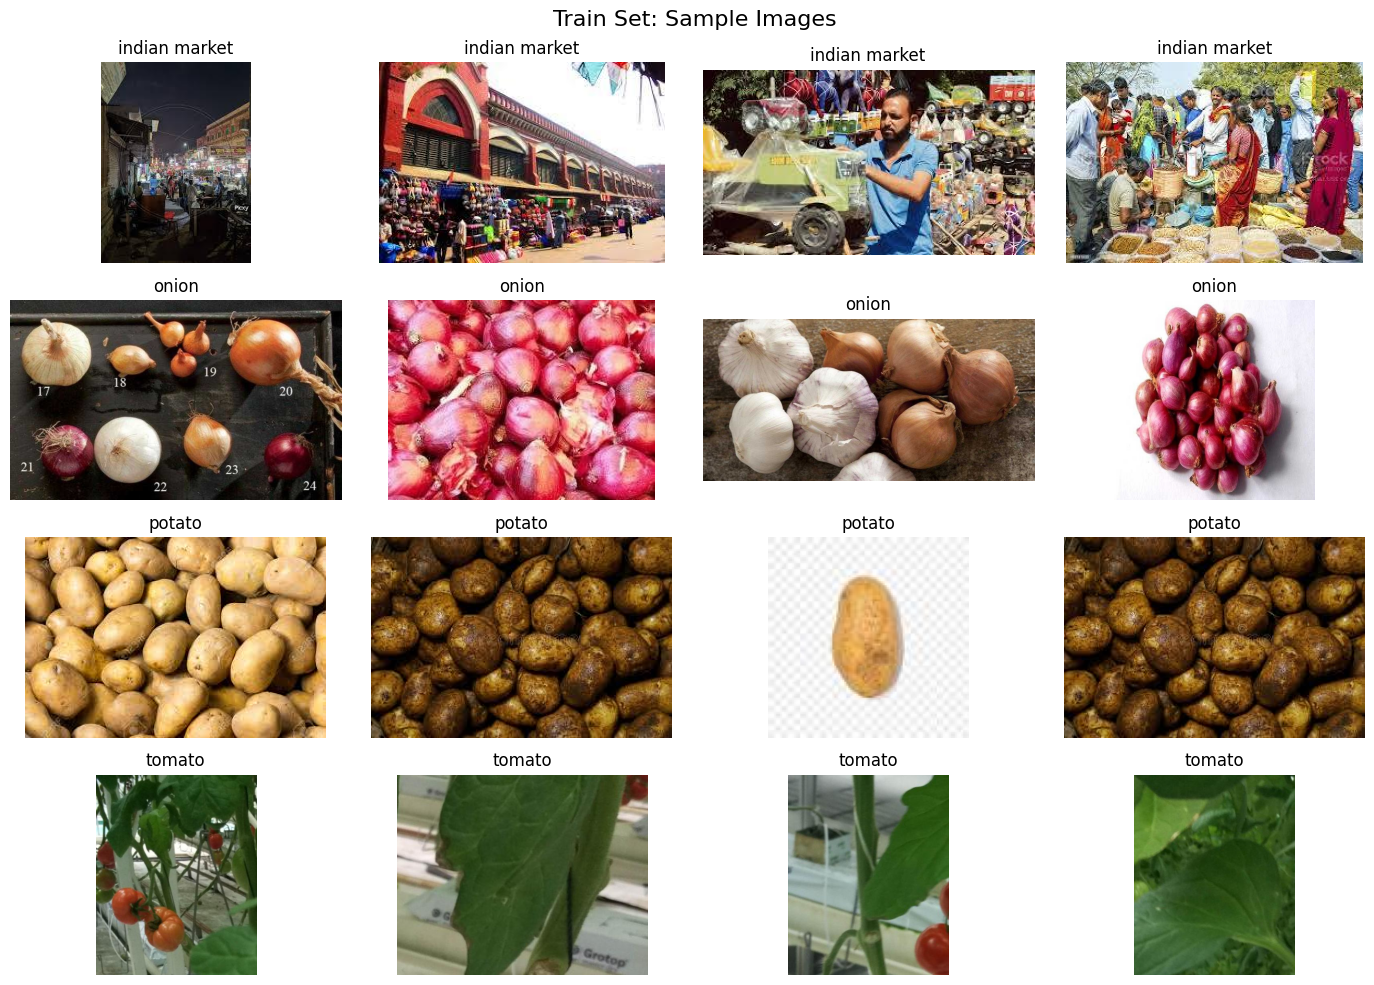

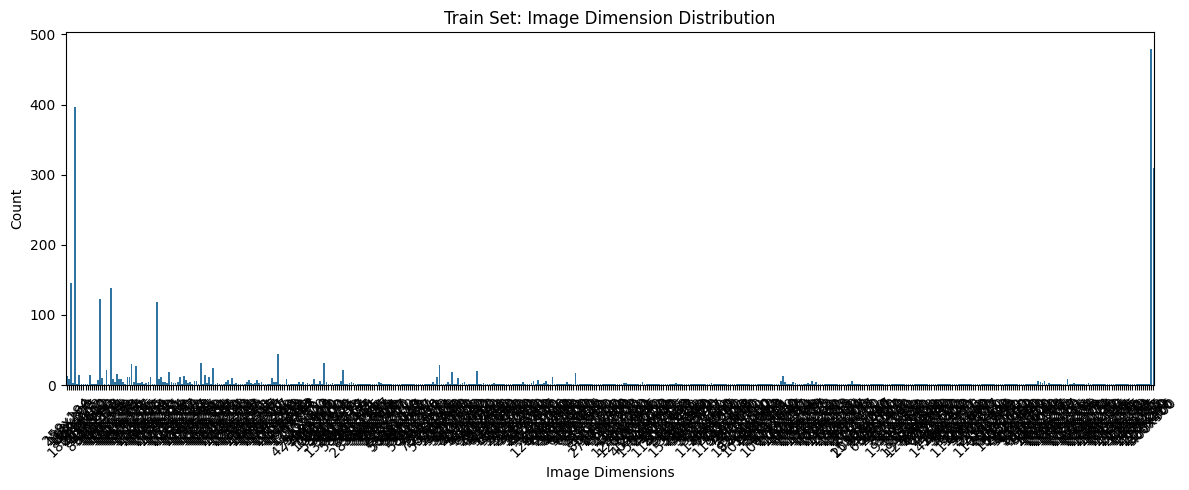

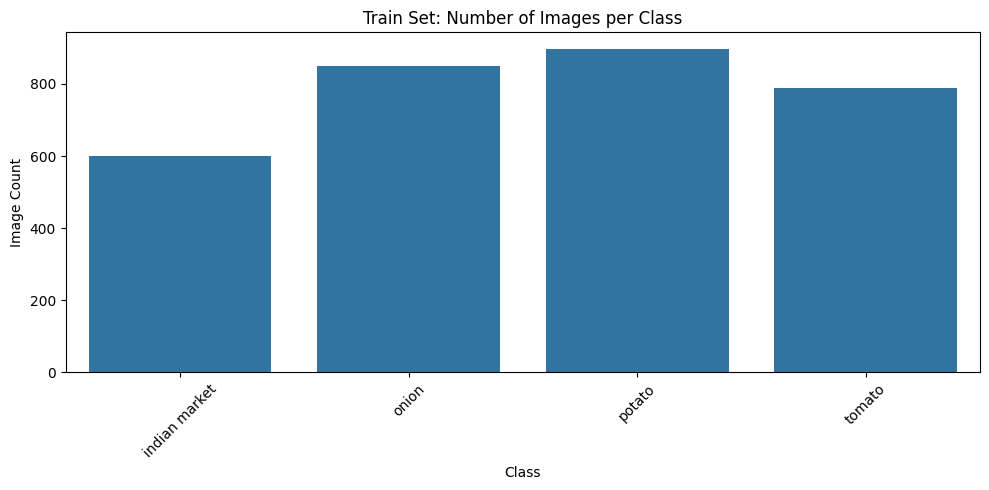


Test Set Class Counts:
indian market: 599 images
onion: 849 images
potato: 898 images
tomato: 789 images


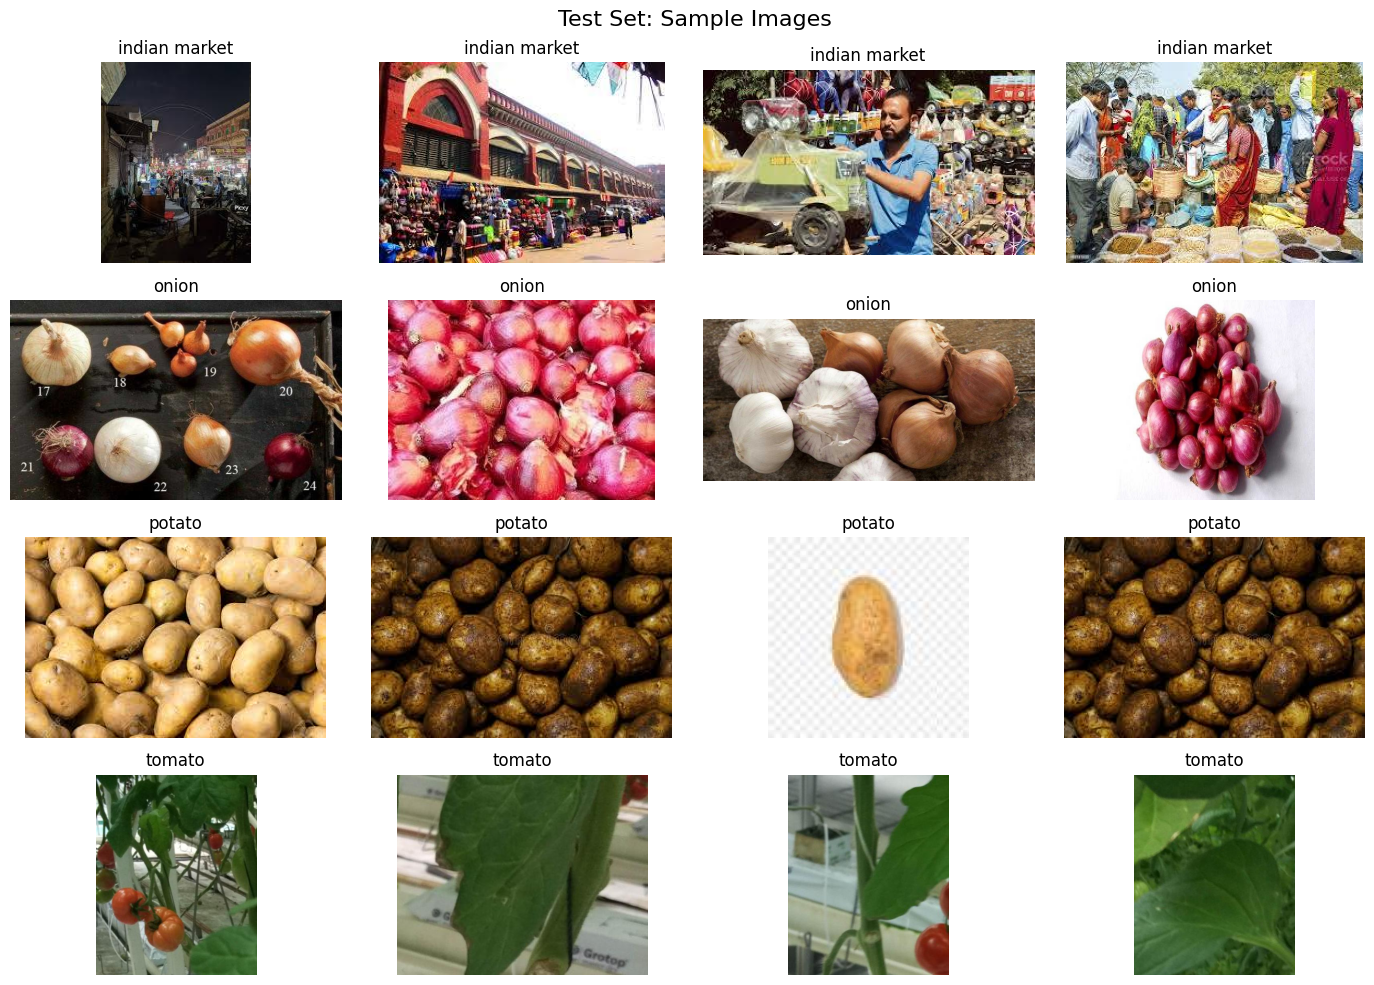

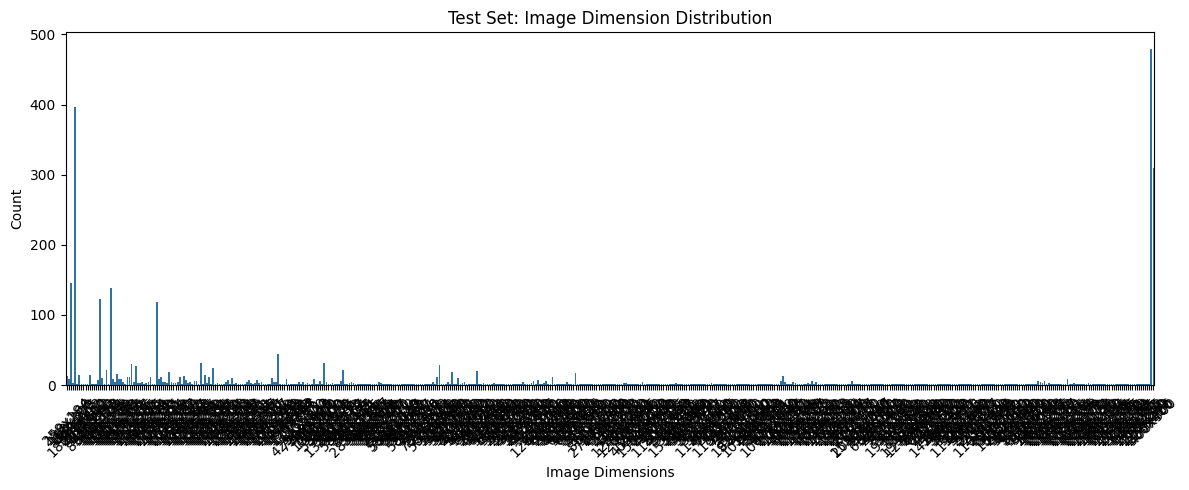

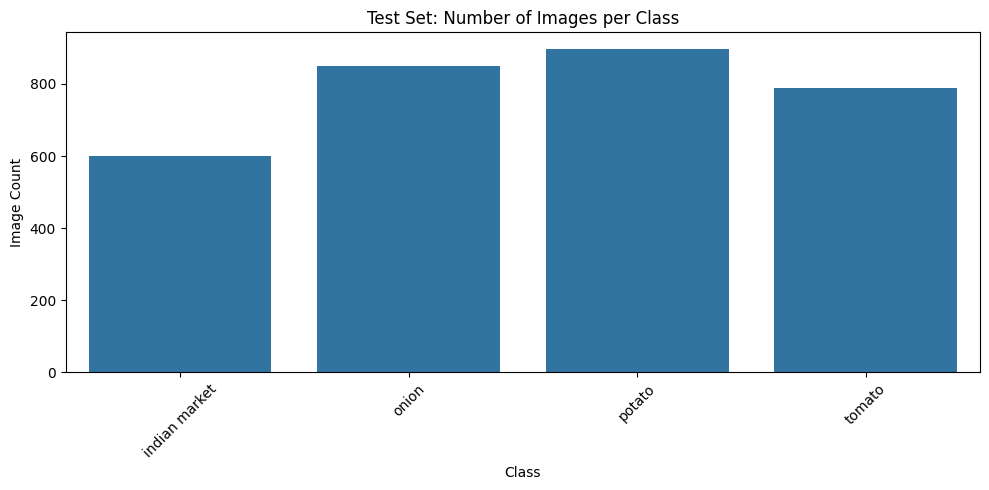

In [6]:
def get_image_paths(folder_path):
    """Returns dictionary with class-wise image paths."""
    class_image_paths = {}
    for class_name in os.listdir(folder_path):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            images = [os.path.join(class_dir, img) for img in os.listdir(class_dir)
                      if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            class_image_paths[class_name] = images
    return class_image_paths

def plot_image_grid(image_paths_dict, title_prefix="Train", num_images=4):
    """Plots a grid of sample images from each class."""
    plt.figure(figsize=(14, 10))
    idx = 1
    for class_name, image_paths in image_paths_dict.items():
        for i in range(num_images):
            if i >= len(image_paths):
                continue
            img_path = image_paths[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(len(image_paths_dict), num_images, idx)
            plt.imshow(img)
            plt.title(f"{class_name}")
            plt.axis('off')
            idx += 1
    plt.suptitle(f"{title_prefix} Set: Sample Images", fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_image_dimensions(image_paths_dict, title_prefix="Train"):
    """Checks image dimensions and plots non-uniform sizes."""
    dim_counter = defaultdict(int)
    for image_paths in image_paths_dict.values():
        for path in image_paths:
            img = cv2.imread(path)
            if img is not None:
                h, w = img.shape[:2]
                dim_counter[(h, w)] += 1

    dims = list(dim_counter.keys())
    counts = list(dim_counter.values())

    plt.figure(figsize=(12, 5))
    sns.barplot(x=[f"{d[0]}x{d[1]}" for d in dims], y=counts)
    plt.xticks(rotation=45)
    plt.xlabel("Image Dimensions")
    plt.ylabel("Count")
    plt.title(f"{title_prefix} Set: Image Dimension Distribution")
    plt.tight_layout()
    plt.show()

def plot_image_counts(image_paths_dict, title_prefix="Train"):
    """Plots histogram of image counts per class."""
    class_names = list(image_paths_dict.keys())
    image_counts = [len(paths) for paths in image_paths_dict.values()]

    plt.figure(figsize=(10, 5))
    sns.barplot(x=class_names, y=image_counts)
    plt.xticks(rotation=45)
    plt.xlabel("Class")
    plt.ylabel("Image Count")
    plt.title(f"{title_prefix} Set: Number of Images per Class")
    plt.tight_layout()
    plt.show()

# === Replace with your actual paths ===
train_dir = r"dataset\ninjacart_data\train"
test_dir = r"dataset\ninjacart_data\train"

# === TRAIN SET ===
train_image_paths = get_image_paths(train_dir)
print("Train Set Class Counts:")
for cls, paths in train_image_paths.items():
    print(f"{cls}: {len(paths)} images")

plot_image_grid(train_image_paths, title_prefix="Train")
plot_image_dimensions(train_image_paths, title_prefix="Train")
plot_image_counts(train_image_paths, title_prefix="Train")

# === TEST SET ===
test_image_paths = get_image_paths(test_dir)
print("\nTest Set Class Counts:")
for cls, paths in test_image_paths.items():
    print(f"{cls}: {len(paths)} images")

plot_image_grid(test_image_paths, title_prefix="Test")
plot_image_dimensions(test_image_paths, title_prefix="Test")
plot_image_counts(test_image_paths, title_prefix="Test")
